In [1]:
import cv2,os
data_path=r"C:\Users\shruthi sree\Downloads\Face-Mask-Detection-master\Face-Mask-Detection-master\dataset"
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 
print(label_dict)
print(categories)
print(labels)

{'without_mask': 0, 'with_mask': 1}
['without_mask', 'with_mask']
[0, 1]


In [2]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])
           
        except Exception as e:
            print('Exception:',e)

Exception: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'

Exception: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-kh7iq4w7\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::c

In [3]:
import numpy as np
data=np.array(data)/255.0
print(data.shape)
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
print(data.shape)
target=np.array(target)

from keras.utils import np_utils
new_target=np_utils.to_categorical(target)
np.save('data',data)
np.save('target',new_target)

(3810, 100, 100)
(3810, 100, 100, 1)


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [5]:
data=np.load('data.npy')
print(data.shape)
target=np.load('target.npy')
#print(target)
#print(data)

(3810, 100, 100, 1)


In [6]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0

In [7]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.15)

checkpoint = ModelCheckpoint('modelmask.model',monitor='val_loss',verbose=1,save_best_only=False,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.15)
score= model.evaluate(train_data,train_target, verbose=0)
print("score", score)


Epoch 1/20
86/86 [==============================] - 54s 607ms/step - loss: 0.6576 - accuracy: 0.6332 - val_loss: 0.4117 - val_accuracy: 0.8107

Epoch 00001: saving model to modelmask.model
INFO:tensorflow:Assets written to: modelmask.model\assets
Epoch 2/20
86/86 [==============================] - 47s 542ms/step - loss: 0.3887 - accuracy: 0.8333 - val_loss: 0.3469 - val_accuracy: 0.8333

Epoch 00002: saving model to modelmask.model
INFO:tensorflow:Assets written to: modelmask.model\assets
Epoch 3/20
86/86 [==============================] - 50s 586ms/step - loss: 0.2872 - accuracy: 0.8797 - val_loss: 0.3158 - val_accuracy: 0.8848

Epoch 00003: saving model to modelmask.model
INFO:tensorflow:Assets written to: modelmask.model\assets
Epoch 4/20
86/86 [==============================] - 48s 563ms/step - loss: 0.2090 - accuracy: 0.9150 - val_loss: 0.2655 - val_accuracy: 0.8889

Epoch 00004: saving model to modelmask.model
INFO:tensorflow:Assets written to: modelmask.model\assets
Epoch 5/20
8

In [8]:
from sklearn.metrics import classification_report
predIdxs = model.predict(test_data, batch_size=32)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(test_target.argmax(axis=1), predIdxs))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       296
           1       0.92      0.93      0.93       276

    accuracy                           0.93       572
   macro avg       0.93      0.93      0.93       572
weighted avg       0.93      0.93      0.93       572



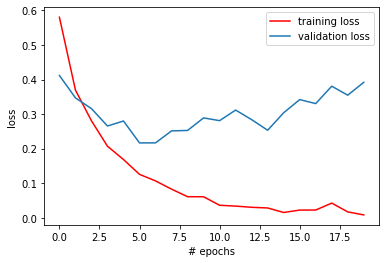

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

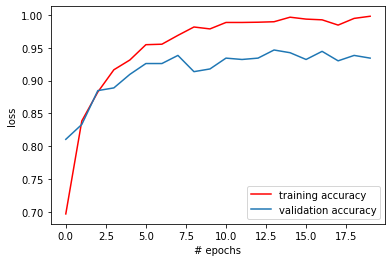

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
print(model.evaluate(test_data,test_target))

18/18 [==============================] - 2s 123ms/step - loss: 0.4639 - accuracy: 0.9318
[0.4638890027999878, 0.9318181872367859]
